# Data Analysis on Olympic Data

In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing dataset
atheletes_df = pd.read_csv('data/olympic dataset/athlete_events.csv')
region_df = pd.read_csv('data/olympic dataset/noc_regions.csv')

In [3]:
atheletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
atheletes_df = atheletes_df.merge(region_df, how='left', on='NOC')

In [6]:
atheletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
atheletes_df.rename(columns = {'region': 'Region', 'notes': 'Notes'}, inplace=True)

In [8]:
atheletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
atheletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
atheletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
### Checking the null values
atheletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
### Print the columns names containing null values or missing values in the form of list

In [13]:
### Nepal Details

atheletes_df.query('Team == "Nepal"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1692,939,Kamal Bahadur Adhikari,M,31.0,163.0,69.0,Nepal,NEP,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN,Nepal,NaN
12597,6866,Sangina Baidya,F,29.0,161.0,48.0,Nepal,NEP,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Flyweight,NaN,Nepal,NaN
15715,8469,Arjun Kumar Basnet,M,32.0,171.0,58.0,Nepal,NEP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Marathon,NaN,Nepal,NaN
15716,8470,Krishna Bahadur Basnet,M,29.0,168.0,58.0,Nepal,NEP,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,NaN,Nepal,NaN
15717,8471,Laxman Basnet,M,23.0,162.0,50.0,Nepal,NEP,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Nepal,NaN


In [14]:
### India Details

atheletes_df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
### Top 10 countries participating

top_10_countries = atheletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

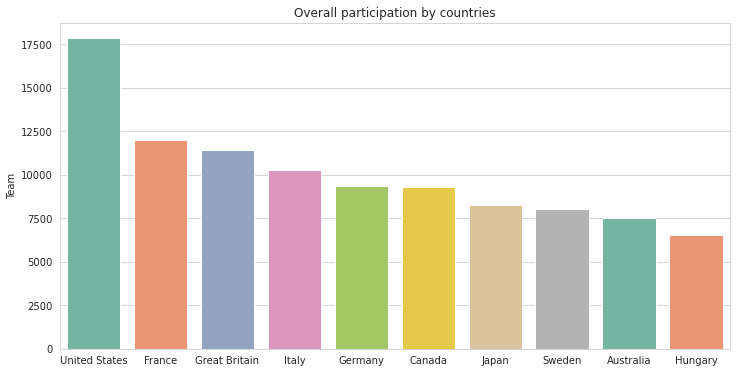

In [16]:
### Plot for the top 10 countries

plt.figure(figsize=(12, 6))
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette= 'Set2')
plt.title('Overall participation by countries')
plt.show()

In [17]:
### Bottom 10 countries participating

bottom_10_countries = atheletes_df.Team.value_counts().sort_values(ascending=False).tail(10)
bottom_10_countries

Suzon IV-39         1
Notavel             1
Marsouin-26         1
Cinara-13           1
Calimucho           1
Ariette-8           1
Newfoundland        1
Greenoaks Dundee    1
Fantlet-2           1
Digby               1
Name: Team, dtype: int64

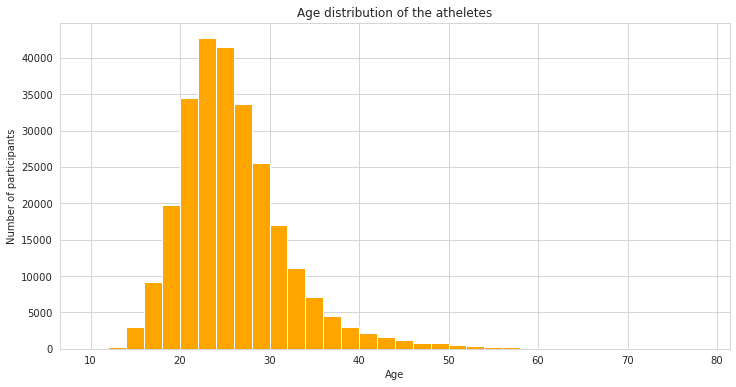

In [18]:
### Age distribution of the participants

plt.figure(figsize=(12, 6))
plt.title('Age distribution of the atheletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(atheletes_df.Age, bins=np.arange(10,80,2), color='orange', edgecolor='white')
plt.show()

In [19]:
### Number of participants in different season

atheletes_df.Season.value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [20]:
### Sports in winter olympics

winter_sports = atheletes_df[atheletes_df.Season == 'Winter'].Sport.unique()
print(winter_sports)
print(len(winter_sports))

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']
17


In [21]:
### Sports in Summer olympics

summer_sports = atheletes_df[atheletes_df.Season == 'Summer'].Sport.unique()
print(summer_sports)
print(len(summer_sports))

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']
52


In [22]:
### Male and female participants

gender_counts = atheletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

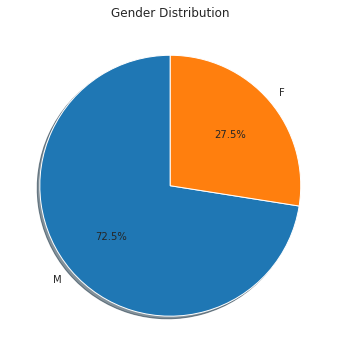

In [23]:
### Pie plotting for male and female
plt.figure(figsize=(12, 6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()

In [24]:
### Total medals

atheletes_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [25]:
### Total number of atheletes in each olympics
female_participants = atheletes_df[(atheletes_df.Sex == 'F') & (atheletes_df.Season == 'Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [26]:
womenOlympics = atheletes_df[(atheletes_df.Sex == 'F') & (atheletes_df.Season == 'Summer')]
womenOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


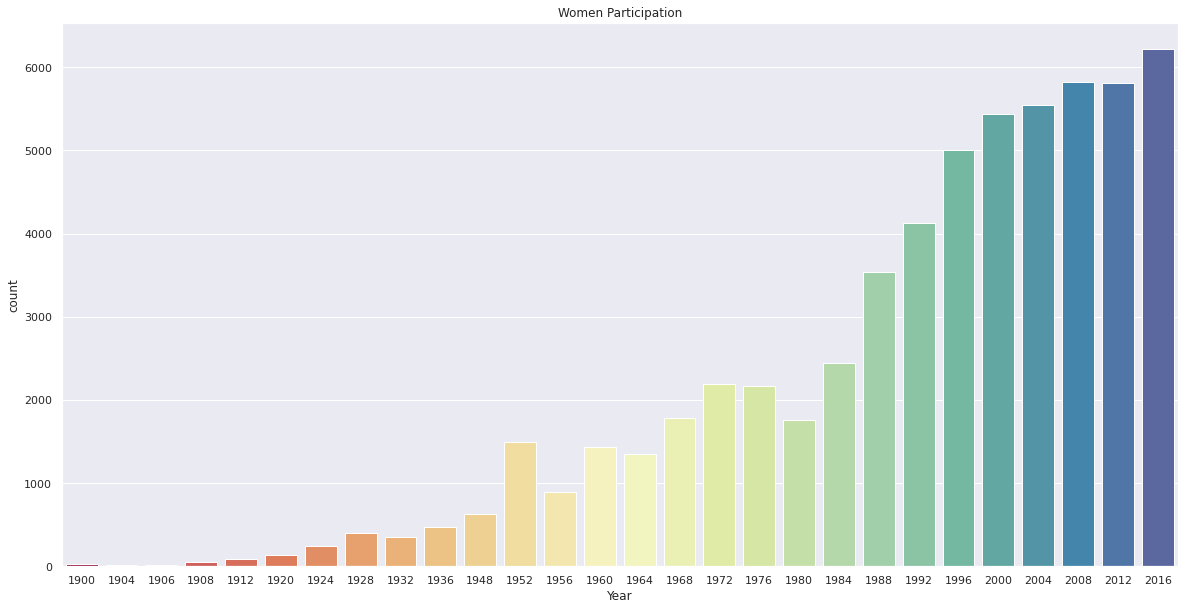

In [27]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Year', data=womenOlympics, palette='Spectral')
plt.title('Women Participation')
plt.show()

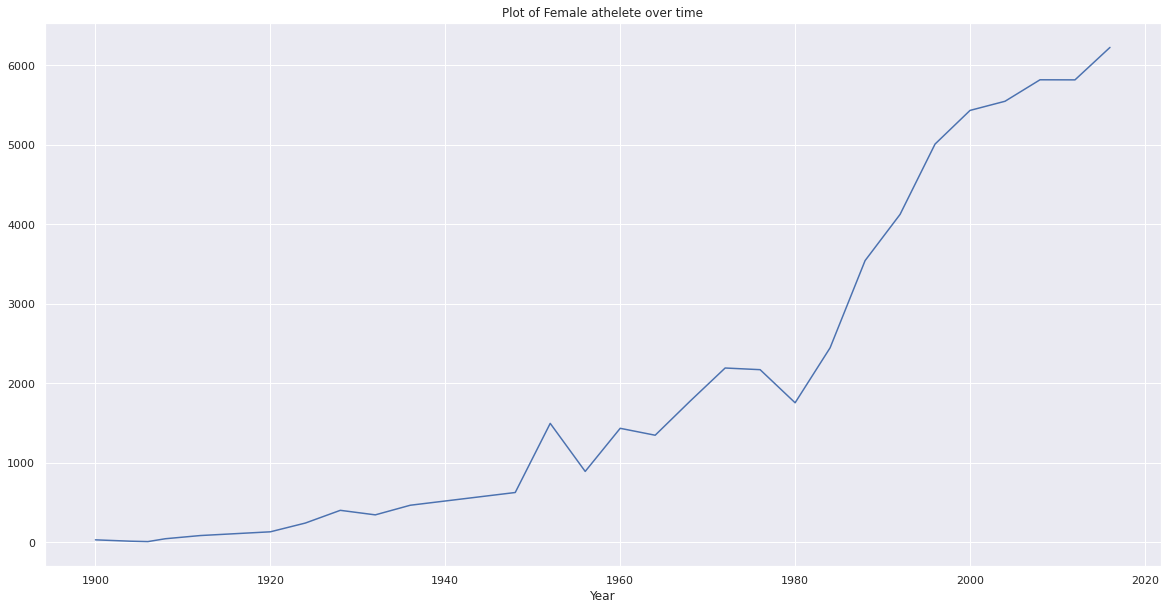

In [28]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:, 'F'].plot()
plt.title('Plot of Female athelete over time')
plt.show()

In [29]:
### Gold Medal Atheletes

goldMedals = atheletes_df[(atheletes_df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [30]:
### Take only the values that are different from NaN

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [31]:
### Gold beyond 60
goldMedals['ID'][goldMedals['Age'] > 60].count()

6

In [32]:
sporting_event = goldMedals['Sport'][goldMedals['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

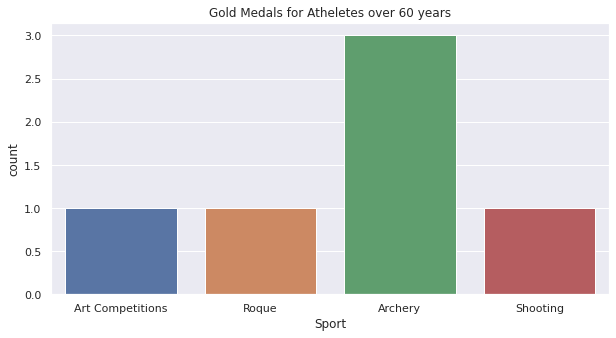

In [33]:
### Plot for sporting event

plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Atheletes over 60 years')
plt.show()

In [34]:
### Gold Medals from each country

goldMedals.Region.value_counts().reset_index(name = 'Medal').head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


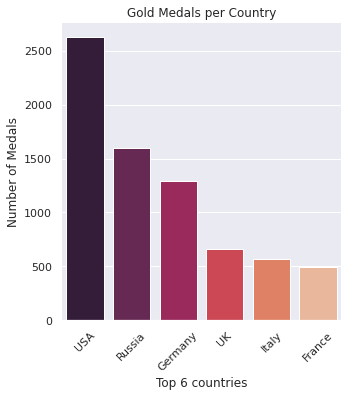

In [35]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name = 'Medal').head(6)
g = sns.catplot(x = 'index', y = 'Medal', data=totalGoldMedals, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels('Top 6 countries')
g.set_ylabels('Number of Medals')
plt.title('Gold Medals per Country')
plt.xticks(rotation=45)
plt.show()

In [36]:
### Rio Olympics
max_year = atheletes_df.Year.max()
print(max_year)

team_names = atheletes_df[(atheletes_df.Year == max_year) & (atheletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(20)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Denmark           15
Serbia            14
Fiji              13
South Korea       13
Hungary           12
Jamaica           11
Netherlands        9
Italy              8
Croatia            7
Spain              7
Name: Team, dtype: int64

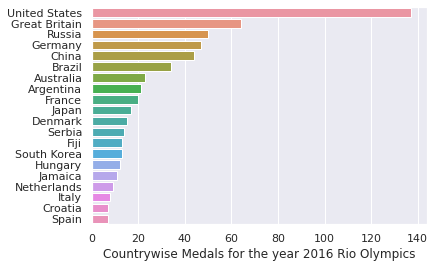

In [37]:
sns.barplot(x = team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Medals for the year 2016 Rio Olympics')
plt.show()

In [38]:
not_null_medals = atheletes_df[(atheletes_df['Height'].notnull()) & (atheletes_df['Weight'].notnull())]

In [ ]:
plt.figure(figsize=(12, 10))
axis = sns.scatterplot(x = 'Height', y = 'Weight', data=not_null_medals, hue='Sex')
plt.title("Height vs Weight of Olympics Medalists")
plt.show()